# Objetivo: Desarrollo de funciones para procesar productos Sentinel-2 co snappy
# Fecha: 26/07/2024
# Autor: Gustavo V. Diaz

In [1]:
# Para manejo de raster


# Para abrir y bajar archivos en lista de bajada
import pandas as pd
import os
import sys
sys.path.append(r'../utils')
import mod_dloader as mdl
import mod_snappy_S2 as msnap

# Para manipular archivo bajado
import snappy
from snappy import Product
from snappy import ProductIO
from snappy import ProductUtils
from snappy import WKTReader
from snappy import HashMap
from snappy import GPF
from snappy import PlainFeatureFactory
from snappy import SimpleFeatureBuilder
from snappy import DefaultGeographicCRS
from snappy import ListFeatureCollection
from snappy import FeatureUtils
from snappy import VectorDataNode
from snappy import ProgressMonitor

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

/opt/venv/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Lectura de df generado para seleccionar productos sentinel-2
path2df = r'/src/output/research_20240725T223256_Tratayen.xls'
df = pd.read_excel(path2df, sheet_name='resume_search')
display(df)
# Pude abrir el xls pero debo guardar la planilla con formato xls y no xlsx como lo había hecho.

,Unnamed: 0,Unnamed: 1,Unnamed: 2,cloudCover,Id,Name,shape,acq_date
0,MSIL2A,T19HET,N0509,14.980999,33a0f98c-5167-5a72-9fb9-0ed7fbb231bc,S2B_MSIL2A_20230107T141709_N0509_R010_T19HET_2...,"POLYGON ((-69.00021 -37.9475895719933, -69.000...",2023-01-07 14:17:09
1,NaN,NaN,N0509,1.562553,ea3043f6-abea-5cb3-ad34-608c33992e76,S2A_MSIL2A_20230112T141711_N0509_R010_T19HET_2...,"POLYGON ((-69.00021 -37.9475895719933, -69.000...",2023-01-12 14:17:11
2,NaN,NaN,N0509,0.000562,64994d5b-4b3f-5d57-bbf0-e3ef099338e7,S2A_MSIL2A_20230115T142711_N0509_R053_T19HET_2...,"POLYGON ((-68.2912 -37.9438257932026, -69.0002...",2023-01-15 14:27:11
3,NaN,NaN,N0509,1.742787,dad956c6-a9f9-521f-b5d9-bb01f969b777,S2B_MSIL2A_20230120T142709_N0509_R053_T19HET_2...,"POLYGON ((-68.287964 -37.9438086140647, -69.00...",2023-01-20 14:27:09
4,NaN,NaN,N0509,0.401804,10e5880c-bef8-54d1-8464-90ad7c24cef8,S2A_MSIL2A_20230122T141711_N0509_R010_T19HET_2...,"POLYGON ((-69.00021 -37.9475895719933, -69.000...",2023-01-22 14:17:11
5,NaN,NaN,N0509,0.001960,735dd08b-3710-5a9e-ac60-bbfdaa484afd,S2A_MSIL2A_20230125T142711_N0509_R053_T19HET_2...,"POLYGON ((-68.298065 -37.9438622103473, -69.00...",2023-01-25 14:27:11
6,NaN,NaN,N0509,0.001072,cc1aefa8-45f9-52fd-bdfe-92c20b083c46,S2B_MSIL2A_20230127T141709_N0509_R010_T19HET_2...,"POLYGON ((-69.0002276354548 -37.9475895719933,...",2023-01-27 14:17:09
7,NaN,NaN,N0509,0.005158,5f35ecac-f932-51d6-84f4-ea149c5514be,S2B_MSIL2A_20230130T142709_N0509_R053_T19HET_2...,"POLYGON ((-68.28497 -37.9437926006053, -69.000...",2023-01-30 14:27:09
8,NaN,NaN,N0509,0.002573,5bf9fff7-ca08-58b6-a99a-fdbe17e15998,S2A_MSIL2A_20230204T142711_N0509_R053_T19HET_2...,"POLYGON ((-68.30292 -37.9438879926409, -69.000...",2023-02-04 14:27:11
9,NaN,NaN,N0509,16.354923,3e2eaa5c-9a83-5a7d-94fc-00aea0bc41b2,S2B_MSIL2A_20230206T141709_N0509_R010_T19HET_2...,"POLYGON ((-69.00021 -37.9475895719933, -69.000...",2023-02-06 14:17:09


**Objetivo para dirigir la misión** \
**Misión**: procesar cada producto S2 con la geometría en la misma proyección que el producto S2\
**Objetivo**: Bajar un producto para leer la proyección del mismo y así hacer la transformación al objeto vectorial

In [3]:
# Id de ejemplo para obtener el tipo de proyección del producto
# Definiciones
user = 'gus838@gmail.com'
passw = 'Ul!RsPWTPuw3'
verbose = True
aux_key = 'access_token'
kc_token = 'KEYCLOAK_TOKEN'
prod_series = df.loc[0]
id_prod_series = prod_series.Id
name_prod_series = prod_series.Name
output_path = r'/src/output/'
str_token = mdl.get_keycloak(user, passw, verbose)
os.environ[kc_token] = str_token
# print(id_prod_series)

Visualización de variables en get_keycloak en módulo mod_dloader.py
{'client_id': 'cdse-public', 'username': 'gus838@gmail.com', 'password': 'Ul!RsPWTPuw3', 'grant_type': 'password'}


In [4]:
# Bajo el producto para examinarlo con snappy



for row in df.iterrows():
    prod_id = row[1]['Id']
    prod_name = row[1]['Name']
    acq_date = row[1]['acq_date']
    str_token = mdl.get_keycloak(user, passw, verbose)
    os.environ[kc_token] = str_token
    print('Variables para generadas en cada iteración:')
    print(f'Id Producto: {prod_id}',f'Nombre producto: {prod_name}',f'user: {user}',f'Key_cloak: {str_token}', sep='\n')
    print(f'Id Producto: {prod_id}',f'\nNombre producto: {prod_name}',f'\nuser: {user}')
    print()
    file2verif = os.path.join(output_path,prod_name + '.zip')
    if os.path.isfile(file2verif):
        print(f'Archivo {file2verif} existente')
        pass
    else:
        print(f'Archivo {file2verif} NO existente, bajando')
        mdl.prod_downloader_2(prod_id, os.environ[kc_token], output_path, prod_name, verbose)
    # BREAK de debug, solo permite que se baje un solo producto (el primero de la lista)
    break
#     if verbose:
#         print("Token de variable 'str_token'", str_token, sep='\n')
#         print('Variable de producto a ingresar a función "Bajadora"', prod_name, prod_id, sep='\n')

Visualización de variables en get_keycloak en módulo mod_dloader.py
{'client_id': 'cdse-public', 'username': 'gus838@gmail.com', 'password': 'Ul!RsPWTPuw3', 'grant_type': 'password'}
Variables para generadas en cada iteración:
Id Producto: 33a0f98c-5167-5a72-9fb9-0ed7fbb231bc
Nombre producto: S2B_MSIL2A_20230107T141709_N0509_R010_T19HET_20230107T181706.SAFE
user: gus838@gmail.com
Key_cloak: eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJYVUh3VWZKaHVDVWo0X3k4ZF8xM0hxWXBYMFdwdDd2anhob2FPLUxzREZFIn0.eyJleHAiOjE3MjY5NTQxNzgsImlhdCI6MTcyNjk1MzU3OCwianRpIjoiZTY0ZWYwZWYtOWMyMy00MGNhLWE0ZTEtNWQxMDMwZGQ2OTQwIiwiaXNzIjoiaHR0cHM6Ly9pZGVudGl0eS5kYXRhc3BhY2UuY29wZXJuaWN1cy5ldS9hdXRoL3JlYWxtcy9DRFNFIiwiYXVkIjpbIkNMT1VERkVSUk9fUFVCTElDIiwiYWNjb3VudCJdLCJzdWIiOiI5NjNiNzVlZC01YWUyLTQzMWQtOGU3Yy0zZDNjYTc4ZDYxNDkiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJjZHNlLXB1YmxpYyIsInNlc3Npb25fc3RhdGUiOiIwYWMxYjM5YS01MDdlLTRiZDctYjRiMC0zMTg3NjAyZDc1NGQiLCJhbGxvd2VkLW9yaWdpbnMiOlsiaHR0cHM6Ly9sb2NhbGhvc3Q6NDIwMCIsIioiLCJodH

In [5]:
# Manejo de producto sentinel para leer proyección de producto
product = ProductIO.readProduct(file2verif)

# Procesamiento de datos
width = product.getSceneRasterWidth()
print(f"Ancho: {width} px\n")
height = product.getSceneRasterHeight()
print(f"Alto: {height} px\n")
prod_name = product.getName()
print(f"Nombre: {prod_name}\n")
band_names = product.getBandNames()
# print(f"Nombre de bandas: {band_names}")
# print("Band names: {}".format(", ".join(band_names)))
str_band_n = ", ".join(band_names).split(", ")
print(f"Cantidad de bandas: {len(str_band_n)}\n")
# display(len(str_band_n), str_band_n)
crs_raster = product.getSceneCRS()
geocod_raster = product.getSceneGeoCoding()
# print("Muestras de proyección de producto", type(crs_raster), crs_raster, type(geocod_raster), geocod_raster, sep = '\n')

Ancho: 10980 px

Alto: 10980 px

Nombre: S2B_MSIL2A_20230107T141709_N0509_R010_T19HET_20230107T181706

Cantidad de bandas: 158



In [6]:
# from osgeo import gdal -> No funciona, no encuentra el módulo _gdal
# !python3 test_script.py -> No funciona, ValueError: filedescriptor out of range in select()
# Intento por la vía del scripting en python llamando a un script ejecutable
# Ya logré obtener geometría de kml y reproyectar coordenadas de geometría a proyección que leí de producto Sentinel
# Ahora voy por levantar el archivo que tiene el WKT reproyectado y cortar el producto para verlo en pantalla.

## Archivo que contiene wkt reproyectado
wkt_path = r'./aux_files/wkt_reproj_file.txt'
## Archivo que contiene wkt original
wkt_orig_path = r'./aux_files/wkt_file.txt'

with open(wkt_path, 'r') as f:
    wkt_reproj = f.readline()

with open(wkt_orig_path, 'r') as f:
    wkt_orig = f.readline()

print("Lectura de archivo contenedor de WKT reproyectado y orignal", wkt_reproj, wkt_orig, sep='\n')

Lectura de archivo contenedor de WKT reproyectado y orignal
POLYGON ((535131.363187576 5745226.53293116 0,536220.080111037 5743114.29916847 0,540929.824764003 5743516.6664413 0,542194.185237653 5744614.69785195 0,539682.890919328 5747574.41152683 0,535980.320736327 5747240.66225041 0,535131.363187576 5745226.53293116 0))
POLYGON ((-68.5974389987327 -38.4405494769166 0,-68.5848549279354 -38.4595413423777 0,-68.5308981309906 -38.4557115385539 0,-68.5164736486453 -38.4457572914763 0,-68.5454183508289 -38.4191997221209 0,-68.5878144507599 -38.4223643154619 0,-68.5974389987327 -38.4405494769166 0))


In [7]:
## Lectura de WKT con snappy
geometry = WKTReader().read(wkt_reproj)
geometry_4326 = WKTReader().read(wkt_orig)
print(geometry)
print(geometry_4326)
# Aparentemente leyó correctemente la geometría definida en WKT

POLYGON ((535131.363187576 5745226.53293116, 536220.080111037 5743114.29916847, 540929.824764003 5743516.6664413, 542194.185237653 5744614.69785195, 539682.890919328 5747574.41152683, 535980.320736327 5747240.66225041, 535131.363187576 5745226.53293116))
POLYGON ((-68.5974389987327 -38.4405494769166, -68.5848549279354 -38.4595413423777, -68.5308981309906 -38.4557115385539, -68.5164736486453 -38.4457572914763, -68.5454183508289 -38.4191997221209, -68.5878144507599 -38.4223643154619, -68.5974389987327 -38.4405494769166))


In [8]:
# Objetivo 2 del día Cortar producto por geometría
SubsetOp = snappy.jpy.get_type('org.esa.snap.core.gpf.common.SubsetOp')
geometry = WKTReader().read(wkt_reproj)
HashMap = snappy.jpy.get_type('java.util.HashMap')
GPF.getDefaultInstance().getOperatorSpiRegistry().loadOperatorSpis()
parameters = HashMap()
parameters.put('copyMetadata', True)
parameters.put('geoRegion', geometry_4326)
product_subset = GPF.createProduct('Subset', parameters, product)

In [9]:
## Verificicación de creación de subset
width = product_subset.getSceneRasterWidth()
print("Width: {}px".format(width))
height = product_subset.getSceneRasterHeight()
print("Height: {} px".format(height))
band_names = product_subset.getBandNames()
band_list = ", ".join(band_names).split(', ')
display(band_list)
# print("Band names: {}".format(", ".join(band_names)))
band = product_subset.getBand(band_names[0])
print(band.getRasterSize())

Width: 706px
Height: 446 px


['B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B8A',
 'B9',
 'B11',
 'B12',
 'quality_aot',
 'quality_wvp',
 'quality_cloud_confidence',
 'quality_snow_confidence',
 'quality_scene_classification',
 'B_detector_footprint_B1',
 'B_detector_footprint_B2',
 'B_detector_footprint_B3',
 'B_detector_footprint_B4',
 'B_detector_footprint_B5',
 'B_detector_footprint_B6',
 'B_detector_footprint_B7',
 'B_detector_footprint_B8',
 'B_detector_footprint_B8A',
 'B_detector_footprint_B9',
 'B_detector_footprint_B11',
 'B_detector_footprint_B12',
 'B_ancillary_lost_B1',
 'B_ancillary_degraded_B1',
 'B_msi_lost_B1',
 'B_msi_degraded_B1',
 'B_defective_B1',
 'B_nodata_B1',
 'B_partially_corrected_crosstalk_B1',
 'B_saturated_l1a_B1',
 'B_ancillary_lost_B2',
 'B_ancillary_degraded_B2',
 'B_msi_lost_B2',
 'B_msi_degraded_B2',
 'B_defective_B2',
 'B_nodata_B2',
 'B_partially_corrected_crosstalk_B2',
 'B_saturated_l1a_B2',
 'B_ancillary_lost_B3',
 'B_ancillary_degraded_B3',
 'B_msi_lost_B3',
 'B_

java.awt.Dimension[width=353,height=223]


In [10]:
 def plotBand(product,band,vmin,vmax):
    band=product.getBand(band)
    w=band.getRasterWidth()
    h=band.getRasterHeight()
    print(w,h)
    band_data=np.zeros(w*h,np.float32)
    band.readPixels(0,0,w,h,band_data)
    band_data.shape=h,w
    width=12
    height=12
    plt.figure(figsize=(width,height))
    imgplot=plt.imshow(band_data,cmap=plt.cm.binary,vmin=vmin,vmax=vmax)

    return imgplot

 def plotRGB_s2(product, title, vmin, vmax):
    band_list = ['B4','B3','B2']
    band_stack = []
    for band in band_list:
        band=product.getBand(band)
        w=band.getRasterWidth()
        h=band.getRasterHeight()
#         depth = 3
        print(w,h)
        band_layer=np.zeros(w*h,np.float32)
        band.readPixels(0,0,w,h,band_layer)
        band_layer.shape=h,w
        band_stack.append(band_layer)
        
    width=12
    height=12
    rgb = np.dstack(band_stack)  # stacks 3 h x w arrays -> h x w x 3
    plt.figure(figsize=(width,height))
    plt.title('Producto de fecha: ' + title, fontweight ="bold") 
    imgplot=plt.imshow(rgb,cmap=plt.cm.binary,vmin=vmin,vmax=vmax)
    plt.savefig('./aux_files/muetra.png', bbox_inches='tight')

    return imgplot

706 446


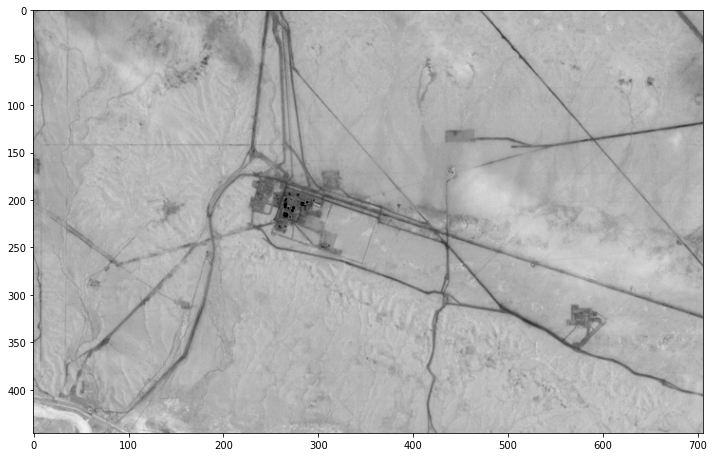

In [11]:
plotBand(product_subset, 'B2',0, 0.3)

In [12]:
# Guardo producto subseteado
# ProductIO.writeProduct(product_subset, "./aux_files/s2_subset_example.tif", 'GeoTIFF')
# ProductIO.writeProduct(target_file, <path+Name>,  'GeoTIFF')
# %run -i './snappy_examples/snappy_write_image.py ./aux_files/s2_subset_example.tif'

706 446
706 446
706 446


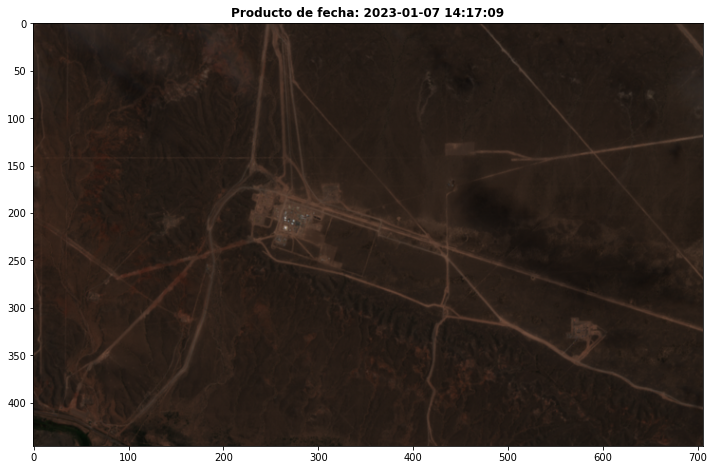

In [13]:
# Debugging de función para generar visual de prueba
plotRGB_s2(product_subset, str(acq_date), 0, 0.3)

In [14]:
# Objetivo: Enmascarar producto recortado
# HashMap = snappy.jpy.get_type('java.util.HashMap')
# # GPF.getDefaultInstance().getOperatorSpiRegistry().loadOperatorSpis()
# parameters = HashMap()
# parameters.put('copyMetadata', True)
# parameters.put('geoRegion', geometry_4326)
# product_subset = GPF.createProduct('Subset', parameters, product)

# separateShapes = False
# HashMap = jpy.get_type('java.util.HashMap')
# parameters = HashMap()
# parameters.put('vectorFile', vectorfile)
# parameters.put('separateShapes', separateShapes)
# #####################
# band_with_vector_1 = GPF.createProduct('Import-Vector', parameters, input_product)
# #####################
# Landseamask with imported geometry

# Importo WKT a producto
# Verifico que exista wkt de referencia
print(geometry_4326) # Existe
wktFeatureType = PlainFeatureFactory.createDefaultFeatureType(DefaultGeographicCRS.WGS84)
featureBuilder = SimpleFeatureBuilder(wktFeatureType)
wktFeature = featureBuilder.buildFeature('shape')
dir(wktFeature)
wktFeature.setDefaultGeometry(geometry_4326)

newCollection = ListFeatureCollection(wktFeatureType)
newCollection.add(wktFeature)

productFeatures = FeatureUtils.clipFeatureCollectionToProductBounds(newCollection, product, None, ProgressMonitor.NULL)

node = VectorDataNode('shape', productFeatures)
print ('Num features = ', node.getFeatureCollection().size())

product_subset.getVectorDataGroup().add(node)

vdGroup = product_subset.getVectorDataGroup()
for i in range(vdGroup.getNodeCount()):
    print('Vector data = ', vdGroup.get(i).getName())

maskGroup = product_subset.getMaskGroup()
for i in range(maskGroup.getNodeCount()):
    print('Mask = ', maskGroup.get(i).getName())

POLYGON ((-68.5974389987327 -38.4405494769166, -68.5848549279354 -38.4595413423777, -68.5308981309906 -38.4557115385539, -68.5164736486453 -38.4457572914763, -68.5454183508289 -38.4191997221209, -68.5878144507599 -38.4223643154619, -68.5974389987327 -38.4405494769166))
Num features =  1
Vector data =  pins
Vector data =  ground_control_points
Vector data =  shape
Mask =  detector_footprint-B01-01
Mask =  detector_footprint-B01-02
Mask =  detector_footprint-B01-03
Mask =  detector_footprint-B01-04
Mask =  detector_footprint-B01-05
Mask =  detector_footprint-B01-06
Mask =  detector_footprint-B01-07
Mask =  detector_footprint-B01-08
Mask =  detector_footprint-B01-09
Mask =  detector_footprint-B01-10
Mask =  detector_footprint-B01-11
Mask =  detector_footprint-B01-12
Mask =  detector_footprint-B02-01
Mask =  detector_footprint-B02-02
Mask =  detector_footprint-B02-03
Mask =  detector_footprint-B02-04
Mask =  detector_footprint-B02-05
Mask =  detector_footprint-B02-06
Mask =  detector_footp

In [15]:
# shape2use = vdGroup.get(2).getName()
# print(shape2use)

# HashMap = snappy.jpy.get_type('java.util.HashMap')
# parameters = HashMap()
# # parameters.put('geometry', geometry_4326)
# parameters.put('geometry', shape2use)
# parameters.put('invertGeometry', False)
# # parameters.put('byPass', True)
# prod_sub_mask = GPF.createProduct('Land-Sea-Mask', parameters, product_subset)

# plotRGB_s2(prod_sub_mask, str(acq_date), 0, 0.3)

# No pude hacer que funcione el enmascarado con el wkt hay que hacer muchas más cosas. Voy a intentar implementando lo que indica el script ndvi_with_masks.py
# Conceptualmente lo que debo hacer es subir la geometría al producto y luego aplicar la máscara.

# Conclusión de desarrollo 15/09/2024
## Recopilación de trabajos
Intenté enmascarar el recorte por el polígono wkt que ingresé pero se torna difícil porque el producto tiene bandas que tienen distintos tipos de resolución espacial. El desarrollo del enmascaramiento queda trunco por dos razones. La primera es por la que hice referencia de las distintas resoluciones pero a pesar de eso tampoco pude resolver el ingreso del polígono que define la máscara. Pude generar la información vectorial a partir del wkt e ingresarla en el producto S2 pero aún así no pude lograr que la función 'Land-Sea-Mask' pueda interpretar al vector cargado para que enmasscare. Essto lo intenté através de snappy y por el graph builder de Snap. En este último intenté generar el código xml de la función 'Land/Sea-Map' pero ahí me enteré que para poder enmascarar con esta función primero se debe resamplear todas las bandas del producto.

El plan de trabajo que sigue tiene como objetivo utilizar tres scripts bash para generar los productos de NDVI y los recortes de los productos S2. Cada script bash tendrá los siguientes objetivos:
1. Primer script filtrar productos de una determinada zona entre un rango de fecha de inicio y fecha de fin
2. Bajar productos filtrados, recortarlos, seleccionar bandas de interés (depende si es NDVI u composición RGB), guardar en geotiff
3. Procesar los geotiff (enmascarado) y devolver coeficientes o composiciones RGB.

Estado general:
* Primer script aun no implementado en bash pero debería llamar a las carpetas de siempre e invocar a través de python el script "searcher_filter.py".
* Segundo script aun no implementado en bash ni en python. Debería ser llamado posteriormente a la ejecución del script de python "searcher_filter.py".
* Tercer script aun no implementado en bash ni en python. Debería ser llamado posteriormente a la ejecución del segundo script python que ya debería haber generado los productos tiff recortados con las bandas correctamente seleccionadas.

**PLAN DE TRABAJO**

* Dejar registro de 

In [16]:
# Código xml de referencia para aplicar función resampleo y posteriormente Land-Sea-Mask
# <node id="Resample">
#     <operator>Resample</operator>
#     <sources>
#       <sourceProduct refid="Read"/>
#     </sources>
#     <parameters class="com.bc.ceres.binding.dom.XppDomElement">
#       <referenceBand>B2</referenceBand>
#       <targetWidth/>
#       <targetHeight/>
#       <targetResolution/>
#       <upsampling>Nearest</upsampling>
#       <downsampling>First</downsampling>
#       <flagDownsampling>First</flagDownsampling>
#       <resamplingPreset/>
#       <bandResamplings/>
#       <resampleOnPyramidLevels>true</resampleOnPyramidLevels>
#     </parameters>
#   </node>
#   <node id="Land-Sea-Mask">
#     <operator>Land-Sea-Mask</operator>
#     <sources>
#       <sourceProduct refid="Resample"/>
#     </sources>
#     <parameters class="com.bc.ceres.binding.dom.XppDomElement">
#       <sourceBands/>
#       <landMask>false</landMask>
#       <useSRTM>false</useSRTM>
#       <geometry>cirrus_clouds</geometry>
#       <invertGeometry>false</invertGeometry>
#       <shorelineExtension>0</shorelineExtension>
#     </parameters>
#   </node>

In [17]:
# Implementación de código generado en celda anterior pero en Snappy
def resize(product, referenceBand):
    from snappy import GPF
    from snappy import HashMap
    if referenceBand == None:
        referenceBand == 'B2'
    upsamp = 'Nearest'
    downsamp = 'First'
    flag_DSamp = 'First'
    resampleOPL = 'true'

    parameters = HashMap()
#     <referenceBand>B2</referenceBand>
    parameters.put('referenceBand', referenceBand)
#     <upsampling>Nearest</upsampling>
#     <downsampling>First</downsampling>
#     <flagDownsampling>First</flagDownsampling>
#     <resampleOnPyramidLevels>true</resampleOnPyramidLevels>
    parameters.put('upsampling', upsamp)
    parameters.put('downsampling', downsamp)
    parameters.put('flagDownsampling', flag_DSamp)
    parameters.put('resampleOnPyramidLevels', resampleOPL)
    return GPF.createProduct('Resample', parameters, product)

In [18]:
resamp_prod = resize(product_subset, 'B2')

In [19]:
shape2use = vdGroup.get(2).getName()
print(shape2use)
def masking(product, geometry_name, invert):
    HashMap = snappy.jpy.get_type('java.util.HashMap')
    parameters = HashMap()
    # parameters.put('geometry', geometry_4326)
    parameters.put('geometry', geometry_name)
    parameters.put('invertGeometry', invert)
    # parameters.put('byPass', True)
    return GPF.createProduct('Land-Sea-Mask', parameters, product)

shape


706 446
706 446
706 446


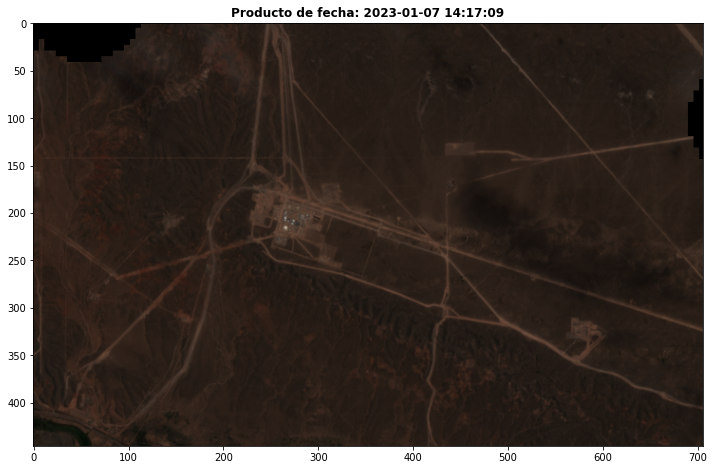

In [20]:
prod_s_res_msk = masking(resamp_prod, 'cirrus_clouds', True)

706 446
706 446
706 446


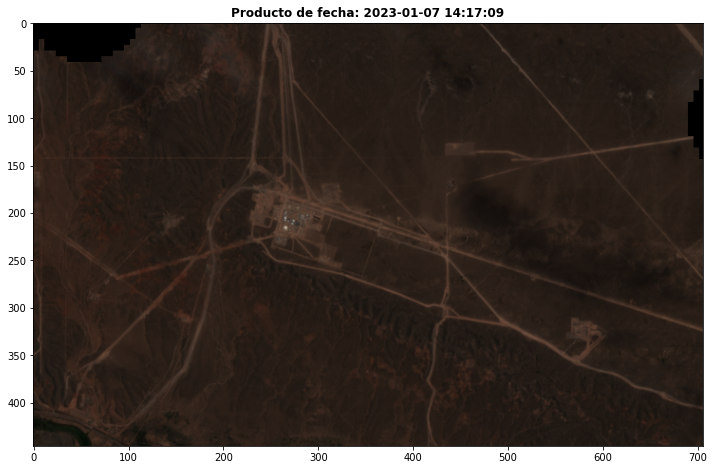

In [21]:
plotRGB_s2(prod_s_res_msk, str(acq_date), 0, 0.3)

In [22]:
prod_s_res_mskC_mskPol = masking(prod_s_res_msk, 'shape', False)

706 446
706 446
706 446


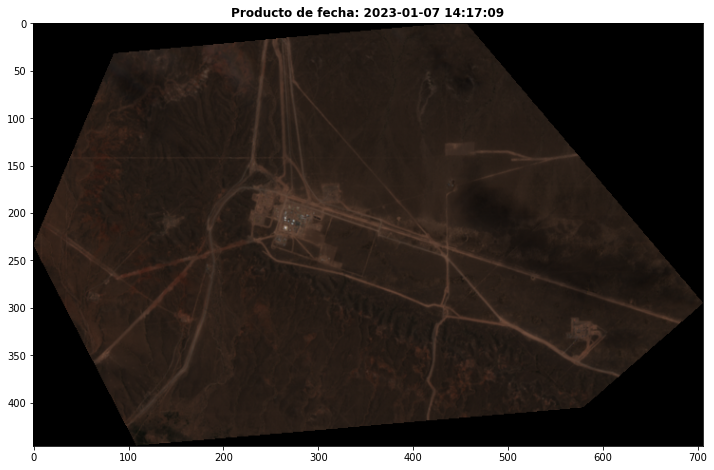

In [23]:
plotRGB_s2(prod_s_res_mskC_mskPol, str(acq_date), 0, 0.3)

# Conclusión de desarrollo 21/09/2024
## Recopilación de trabajos
**Itemizado**
* Pude enmascarar cirros con snappy
* Pude enmascarar producto con shape agregado con snappy

**Descripción**
Las conclusiones de la semana pasada fueron erróneas porque en la implementación de Land-Sea_Mask utilizaba el producto original que no tenía ingresado el dato vectorial. En esta oportunidad cree funciones para que haga el resampleo del producto (mucho más sencillo de lo que imaginé) y luego apliqué dos enmascaramientos. El primero por los cirros y el segundo con el shape ingresado.

**PENDIENTE**
Plantear nuevo plan de trabajo intentando que el desarrollo se pueda implementar en dos scripts de python. Los mismos deben ser llamados por un script bash.

### Funciones de primer script python
* Tomar configuración de búsqueda y traer listado de productos que satisfagan los requerimientos de ROI y fechas
* Entregar listado en csv o pickle, no lo tengo definido

### Funciones de segundo script python
* Bajar producto
* Leer kml de entrada
* Leer procesamiento a realizar (composición RGB o cómputo NDVI)
* Procesarlo:
    * Recortar bordes de kml
    * Enmascarar cirros
    * Enmascarar por polígonos
    * Guardar captura, en caso de ser necesario (podría ser una opción)
    * Registrar producto generado

# Continuo trabajos en notebook "Note2proc.ipynb" 22/09/2024

Continúo la línea de trabajo trazada en cuaderno de notas negro. Allí hay definido un flujo general de procesamiento a implementar para el procesador general (bajar productos, recortar, enmascarar cirros y enmascarar por ROI). Y en primera instancia implemento la composición RGB.

De la implementación para composición RGB también plasmé un flujo que permite tener la siguiente salida
* Carpeta de salida
    * Composiciones RGB
        * Tiff
        * png
    * Tabla metadatos
        * Productos
            * Id
            * acq_date
            * Tiff_Prod_name (salida)
            * Ruta a Tiff_Prod_name
        * Configuración
            * Configuración de búsqueda
            * Cantidad de productos procesados
            * Fecha inicio análisis
            * Fecha fin análisis
            * Fecha procesamiento
            * Nombre ROI 